<a href="https://colab.research.google.com/github/dangtrantanluc/Sklearn/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data_df = pd.read_csv("./Data.csv")
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [8]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    print(f"Column {col}: has {missing_data} missing data")

Column Country: has 0 missing data
Column Age: has 1 missing data
Column Salary: has 1 missing data
Column Purchased: has 0 missing data


<Axes: >

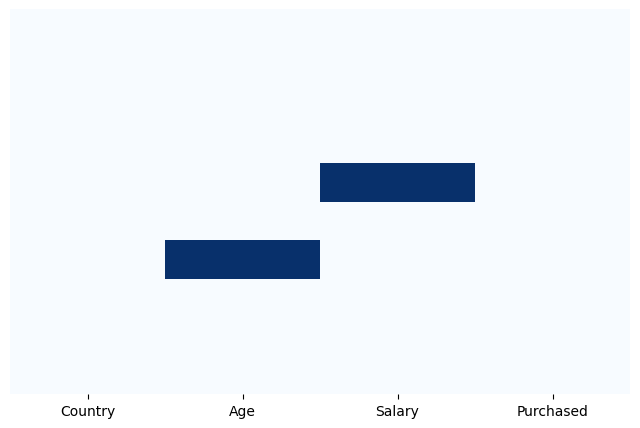

In [9]:
fig, ax =plt.subplots(figsize=(8,5))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False)

In [10]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [11]:
x = data_df.iloc[:, :-1].values

In [12]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [13]:
y = data_df.iloc[:, -1].values

In [14]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [18]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

encode independent variable (x)

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [23]:
x

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [25]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Splitting the dataset()